In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_infos = []
for i in range(7): # 7 clusters
    path = '../Data/Cluster'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df_info = df.mean().append(pd.Series({"count":len(df)}))
    df_infos.append(df_info[2:]) # id averages are meaningless
#     print(i, df.mean(), len(df), sep="\n")
cluster_summaries = pd.concat(df_infos, axis=1).T
cluster_summaries

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
0,20614.571977,1.290469,163.092461,77.692996,134.276387,84.454765,2.555334,1.000000,0.089616,0.069275,0.820768,0.732859,7030.0
1,21074.968123,1.490963,168.443922,72.967511,126.320810,81.344392,1.014669,1.034538,0.101634,0.051745,0.793947,0.508294,16156.0
2,19843.974895,1.408996,164.316946,80.796862,279.612971,1198.381799,1.546025,1.273013,0.108787,0.065900,0.831590,0.846234,956.0
3,18519.528442,1.658352,172.254063,94.814187,130.839842,83.996163,1.179345,1.103499,0.173251,0.094357,0.797630,0.548758,8860.0
4,20322.919689,1.303306,163.743274,77.712783,131.093963,83.611029,2.327533,2.699906,0.077901,0.057020,0.794673,0.627895,7471.0
5,20564.749982,1.083822,155.633413,65.908090,125.764834,80.639716,1.088097,1.052090,0.027023,0.024632,0.806854,0.480837,13803.0
6,16450.734037,1.308382,164.235182,67.523300,120.231620,78.136924,1.080450,1.044327,0.082867,0.049351,0.809463,0.293564,15724.0


In [4]:
n,m = cluster_summaries.shape
cluster_summaries["age"] = cluster_summaries["age"].div(365)
cluster_summaries.sort_values(by=['count'], ascending=False) #8,6,(1),7

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
1,57.739639,1.490963,168.443922,72.967511,126.320810,81.344392,1.014669,1.034538,0.101634,0.051745,0.793947,0.508294,16156.0
6,45.070504,1.308382,164.235182,67.523300,120.231620,78.136924,1.080450,1.044327,0.082867,0.049351,0.809463,0.293564,15724.0
5,56.341781,1.083822,155.633413,65.908090,125.764834,80.639716,1.088097,1.052090,0.027023,0.024632,0.806854,0.480837,13803.0
3,50.738434,1.658352,172.254063,94.814187,130.839842,83.996163,1.179345,1.103499,0.173251,0.094357,0.797630,0.548758,8860.0
4,55.679232,1.303306,163.743274,77.712783,131.093963,83.611029,2.327533,2.699906,0.077901,0.057020,0.794673,0.627895,7471.0
0,56.478279,1.290469,163.092461,77.692996,134.276387,84.454765,2.555334,1.000000,0.089616,0.069275,0.820768,0.732859,7030.0
2,54.367055,1.408996,164.316946,80.796862,279.612971,1198.381799,1.546025,1.273013,0.108787,0.065900,0.831590,0.846234,956.0


In [5]:
cluster_summaries.sort_values(by=['cardio'], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
2,54.367055,1.408996,164.316946,80.796862,279.612971,1198.381799,1.546025,1.273013,0.108787,0.065900,0.831590,0.846234,956.0
0,56.478279,1.290469,163.092461,77.692996,134.276387,84.454765,2.555334,1.000000,0.089616,0.069275,0.820768,0.732859,7030.0
4,55.679232,1.303306,163.743274,77.712783,131.093963,83.611029,2.327533,2.699906,0.077901,0.057020,0.794673,0.627895,7471.0
3,50.738434,1.658352,172.254063,94.814187,130.839842,83.996163,1.179345,1.103499,0.173251,0.094357,0.797630,0.548758,8860.0
1,57.739639,1.490963,168.443922,72.967511,126.320810,81.344392,1.014669,1.034538,0.101634,0.051745,0.793947,0.508294,16156.0
5,56.341781,1.083822,155.633413,65.908090,125.764834,80.639716,1.088097,1.052090,0.027023,0.024632,0.806854,0.480837,13803.0
6,45.070504,1.308382,164.235182,67.523300,120.231620,78.136924,1.080450,1.044327,0.082867,0.049351,0.809463,0.293564,15724.0


In [6]:
# check overall target %
sum(cluster_summaries["cardio"]*cluster_summaries["count"])/sum(cluster_summaries["count"])

0.4997

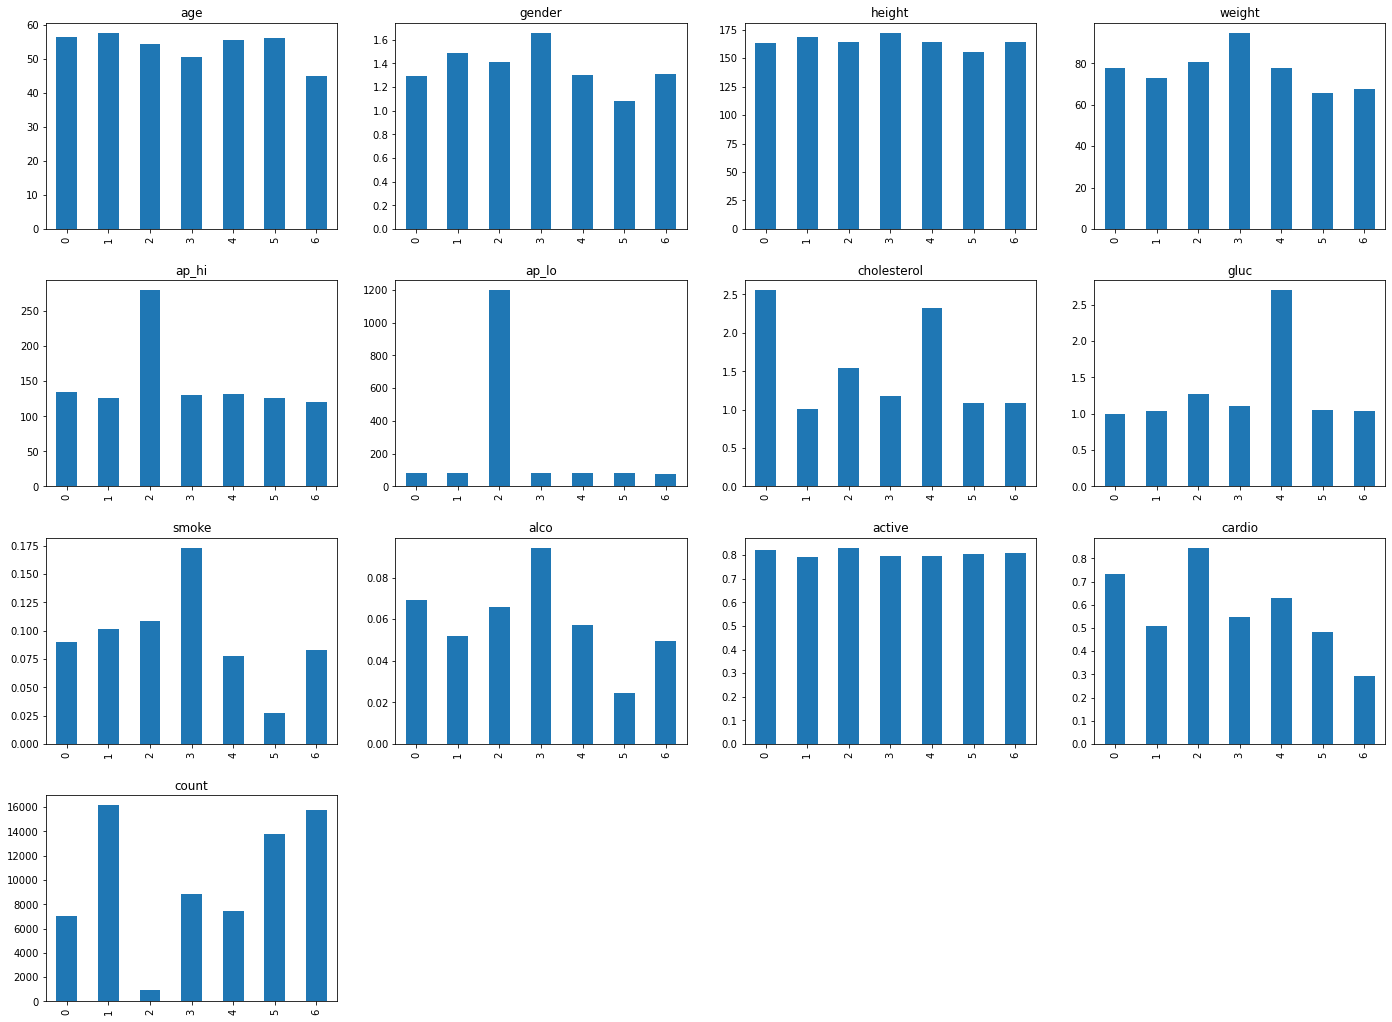

In [7]:
import math
p = math.ceil(math.sqrt(m))
fig, axes = plt.subplots(nrows=p, ncols=p,figsize=(24,18))

plt.subplots_adjust(wspace=0.2, hspace=0.25)

(i,j) = 0,0
for col in cluster_summaries.columns:
    cluster_summaries[col].plot.bar(ax=axes[j//p, j%p])
    axes[j//p, j%p].set_title(col)
    j += 1
    
for r in range(j,p**2): # remove extra axis
    axes[r//p, r%p].set_axis_off()

### Key Observations:
- Cluster 0: high cholesterol
- Cluster 1: lowest cvd%, youngest
- Cluster 2: pure smokers (no alcohol)
- Cluster 3: high glucose, high cholesterol
- Cluster 4: fewest members, highest cvd%, high blood pressure
- Cluster 5: alcoholics, some smokers
- Cluster 6: more male
- Cluster 7: not active at all
- Cluster 8: more female

In [ ]:
# ideally, scatter with cluster index labels